# Introduction to GeoPandas 

In this section, we will cover the basics of geopandas, a Python library to interact with geospatial vector data.

In this section, we will cover the basics of geopandas, a Python library to interact with geospatial vector data.

[Geopandas](https://geopandas.org/) provides an easy-to-use interface to vector data sets. It combines the capabilities of pandas, with the geometry handling functionality of shapely, the geo-spatial file format support of fiona and the map projection libraries of pyproj.

The main data structures in geopandas are `GeoDataFrames` and `GeoSeries`. They extend the functionality of `pandas.DataFrames` and `pandas.Series`. 

In summary, _If you know **pandas** well, you are already through with understanding how `Geopandas` works_ 

There is one key difference between pandas’s data frames and geopandas’ _GeoDataFrames_: a `GeoDataFrame` contains an additional column for geometries. By default, the name of this column is `geometry`, and it is a _GeoSeries_ that contains the geometries (points, lines, polygons, …) as `shapely.geometry` objects.

_see `head()` output from [our previous coding interaction](vector_data_input_output.ipynb)_

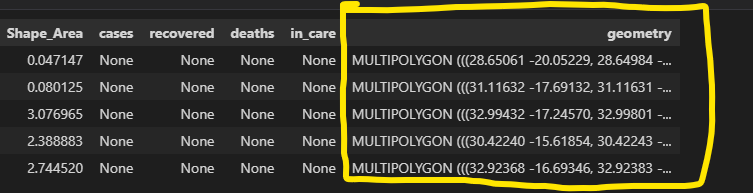

### Input data: from the Zimbabwe Geoportal 

In this illustration we will work with the [Zimbabwe Geoportal](https://zimgeoportal.org.zw/) data which contains free, open and easy to use datasets on Zimbabwe. 

We have placed some datasets in the folder path of this illustration under `input_data` folder. 


### Read and explore geo-spatial data sets 

Before we attempt to load any files, let’s not forget to defining a constant that points to our data directory:

In [5]:
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()

# define the absolute path to the data
input_data_directory = NOTEBOOK_PATH.parent / "input_data"
output_data_directory = NOTEBOOK_PATH.parent / "output_data"

Lets see what shapefiles (.shp) we have in our *input_data* directory. 

In [12]:
what_shp = input_data_directory.glob("*.shp")
list(what_shp)

[WindowsPath('C:/Users/Kumbirai.Matingo/Documents/Midlands State University/Staff Development Fellowship - Lecturing/2024/HSVG 245 - Programming for Geomatics Applications/Lecture_Code_Snippets/input_data/zwe_adm2.shp'),
 WindowsPath('C:/Users/Kumbirai.Matingo/Documents/Midlands State University/Staff Development Fellowship - Lecturing/2024/HSVG 245 - Programming for Geomatics Applications/Lecture_Code_Snippets/input_data/zwe_adm3_lines.shp'),
 WindowsPath('C:/Users/Kumbirai.Matingo/Documents/Midlands State University/Staff Development Fellowship - Lecturing/2024/HSVG 245 - Programming for Geomatics Applications/Lecture_Code_Snippets/input_data/zwe_adm3_points.shp')]

It seems we have three files that are all shapefiles in this directory. Lets store the file we want (*zwe_adm2_.shp*) in a new variable called `districts` by using its index in the list 

In [17]:
what_shp = input_data_directory.glob("*.shp")
districts = list(what_shp)[0]

Now, it's time to open the file and look at its contents: 

In [18]:
import geopandas
the_data = geopandas.read_file(districts)

Check the data type of the data set

In [19]:
type(the_data)

geopandas.geodataframe.GeoDataFrame

Everything went fine, and we have a `geopandas.GeoDataFrame`. 

Let’s also explore the data: 
1. print the first few rows, and 
2. list the columns.

In [20]:
the_data.head()

,OBJECTID,admin2Name,admin2Pcod,admin1Name,admin1Pcod,Shape_Leng,Shape_Area,cases,recovered,deaths,in_case,geometry
0,1.0,Beitbridge,ZW1601,Matabeleland South,ZW16,6.243144,1.111672,None,None,None,None,"POLYGON ((29.90621 -21.26976, 29.91866 -21.276..."
1,2.0,Beitbridge Urban,ZW1622,Matabeleland South,ZW16,0.391538,0.007823,None,None,None,None,"POLYGON ((29.98811 -22.15274, 30.02215 -22.159..."
2,3.0,Bikita,ZW1801,Masvingo,ZW18,3.274864,0.447512,None,None,None,None,"POLYGON ((31.97352 -19.82110, 31.97389 -19.825..."
3,4.0,Bindura,ZW1201,Mashonaland Central,ZW12,3.177016,0.190533,None,None,None,None,"POLYGON ((31.29627 -16.82632, 31.37156 -16.836..."
4,5.0,Bindura Urban,ZW1221,Mashonaland Central,ZW12,0.213425,0.001697,None,None,None,None,"POLYGON ((31.36502 -17.31971, 31.36601 -17.323..."


What are the columns that exists in the data? 

In [21]:
the_data.columns

Index(['OBJECTID', 'admin2Name', 'admin2Pcod', 'admin1Name', 'admin1Pcod',
       'Shape_Leng', 'Shape_Area', 'cases', 'recovered', 'deaths', 'in_case',
       'geometry'],
      dtype='object')

### Explore the data set in a map: 

As geomaticians, we love ❤️ maps. But beyond that, it’s always a good idea to explore a new data set also in a map. To create a simple map of a `geopandas.GeoDataFrame`, simply use its plot() method. 

<Axes: >

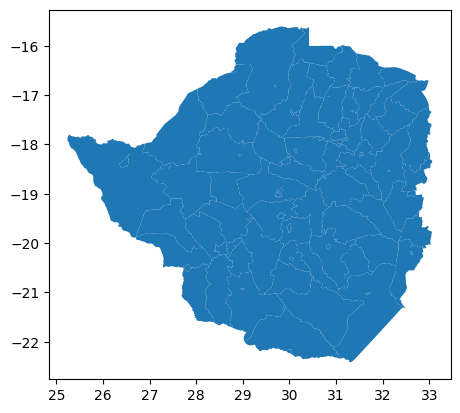

In [22]:
the_data.plot()

It is indeed this easy to produce a map out of an geospatial data set. Geopandas automatically positions your map in a way that it covers the whole extent of your data.

#### Geometries in `geopandas`

Geopandas takes advantage of shapely’s geometry objects. Geometries are stored in a column called geometry.

Let’s print the first 5 rows of the column `geometry`:

In [23]:
the_data.geometry.head()

0    POLYGON ((29.90621 -21.26976, 29.91866 -21.276...
1    POLYGON ((29.98811 -22.15274, 30.02215 -22.159...
2    POLYGON ((31.97352 -19.82110, 31.97389 -19.825...
3    POLYGON ((31.29627 -16.82632, 31.37156 -16.836...
4    POLYGON ((31.36502 -17.31971, 31.36601 -17.323...
Name: geometry, dtype: geometry

The `geometry` columns look somewhat familiar right? 

They are, in fact, `shapely.geometry` objects that, when `print()`ed or type-cast into a `str`, are represented as a WKT string. _[See Vector Data I/O lesson](vector_data_input_output.ipynb) for reference

Since the geometries in a `GeoDataFrame` are stored as shapely objects, we can use **shapely methods** to handle geometries in geopandas.

Let’s take a closer look at (one of) the polygon geometries in the Zimbabwe districts data set, and try to use some of the shapely functionality we are already familiar with. 

For the sake of clarity, first, we’ll work with the geometry of the very first record, only:

_This extracting the first district in our data set to explore further_ 

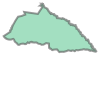

In [24]:
# The value of the column 'geometry' in row 0: 
the_data.at[0, "geometry"]

Can you guess which district in Zimbabwe is this? 

Print information about the area

In [27]:
print(f"Area: {the_data.at[0, 'geometry'].area} units.")

Area: 1.111671735168416 units.


ℹ️ the area represented here is not the actual area and this is because of the CRS being used by the data. This is why we used `units` instead. 

We will explore how to change the CRS later on 

Lets iterate over the first 5 rows of the districts data set to check their areas too

In [29]:
# iterate over the first 5 
for index, row in the_data[:5].iterrows():
    polygon_area = row["geometry"].area
    print(f"The district in row {index} has a surface area of {polygon_area:0.3f} units")

The district in row 0 has a surface area of 1.112 units
The district in row 1 has a surface area of 0.008 units
The district in row 2 has a surface area of 0.448 units
The district in row 3 has a surface area of 0.191 units
The district in row 4 has a surface area of 0.002 units


Of course the `iterrows()` pattern is not the most convenient and efficient way to calculate the area of many rows. Both `GeoSeries` (geometry columns) and `GeoDataFrames` have an `area` property:

In [30]:
# the 'area' property of a Geodataframe 
the_data.area

C:\Users\Kumbirai.Matingo\AppData\Local\Temp\ipykernel_16448\1759852020.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  the_data.area


0     1.111672
1     0.007823
2     0.447512
3     0.190533
4     0.001697
        ...   
86    0.002346
87    0.270485
88    0.516600
89    0.214057
90    0.005395
Length: 91, dtype: float64

In [31]:
# the 'area' property of a Geoseries 
the_data["geometry"].area

C:\Users\Kumbirai.Matingo\AppData\Local\Temp\ipykernel_16448\1866809184.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  the_data["geometry"].area


0     1.111672
1     0.007823
2     0.447512
3     0.190533
4     0.001697
        ...   
86    0.002346
87    0.270485
88    0.516600
89    0.214057
90    0.005395
Length: 91, dtype: float64

_Did you notice something in the cell output? `Geopandas` is actually telling us that we're using a **geographic CRS** so our area results are most likely not correct_ which is VERY true. 

It then goes on to provide us with what to do to convert these coordinates to something more accurate, but we will touch on that later on. 


### Write a subset of data to a file 

Previously we learnt how to write an entire `GeoDataFrame` to a file. We can also write a filtered subset of a data set to a new file, e.g., to help with processing complex data sets.

First, isolate selected district(s) in the input data set (all districts in `Masvingo` Province):

In [32]:
masvingo = the_data[the_data.admin1Name == 'Masvingo']

Then, plot the data subset to visually check whether it looks correct before proceeding: 

<Axes: >

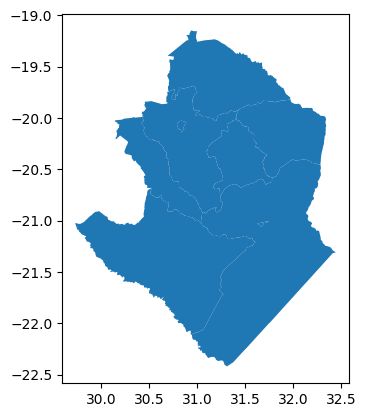

In [33]:
masvingo.plot()

Wow 🤩, now finally write the remaining disticts in Masvingo Province to a shapefile: 

In [34]:
masvingo.to_file(output_data_directory / "districts_in_masvingo.shp")

Congratulations! You've just learnt how to create spatial data with Python 

To address the CRS issue, we recommend [Handling coordinate reference systems in Geopandas](crs_with_geopandas.ipynb) 